In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## part 1

In [20]:
def bitQuantizeImage(im,k):
    factor=2**(8-k)
    ret=im//factor
    return factor*ret 
    

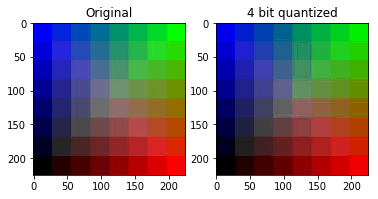

In [28]:
filename = "../input_data/quantize.jpg"
im = cv2.imread(filename,1)
k=4
ans = bitQuantizeImage(im, k)
temp = str(k) + " bit quantized"
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(ans, cv2.COLOR_BGR2RGB))
plt.title(temp)
plt.show()



## part 2

In [16]:
def BitPlaneSlicing(img,k):
#     img = cv2.imread(filename,0)
    bin_val = []

    w = img.shape[0]
    h = img.shape[1]

    for i in range(w):
        for j in range(h):
            bin_val.append(np.binary_repr(img[i][j], width=8)) #width is 8 bc total bits are 8

    new1 = (np.array([int(i[7]) for i in bin_val],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
    new2 = (np.array([int(i[6]) for i in bin_val],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
    new3 = (np.array([int(i[5]) for i in bin_val],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
    new4 = (np.array([int(i[4]) for i in bin_val],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
    new5 = (np.array([int(i[3]) for i in bin_val],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
    new6 = (np.array([int(i[2]) for i in bin_val],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
    new7 = (np.array([int(i[1]) for i in bin_val],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
    new8 = (np.array([int(i[0]) for i in bin_val],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
    listim = [new1,new2,new3,new4,new5,new6,new7,new8]
    
    fig = plt.figure()
    plt.subplot(2,4,1)
    plt.imshow(new1,cmap='gray')
    plt.title("1 bit")
    plt.subplot(2,4,2)
    plt.imshow(new2,cmap='gray')
    plt.title("2 bit")
    plt.subplot(2,4,3)
    plt.imshow(new3,cmap='gray')
    plt.title("3 bit")
    plt.subplot(2,4,4)
    plt.imshow(new4,cmap='gray')
    plt.title("4 bit")
    plt.subplot(2,4,5)
    plt.imshow(new5,cmap='gray')
    plt.title("5 bit")
    plt.subplot(2,4,6)
    plt.imshow(new6,cmap='gray')
    plt.title("6 bit")
    plt.subplot(2,4,7)
    plt.imshow(new7,cmap='gray')
    plt.title("7 bit")
    plt.subplot(2,4,8)
    plt.imshow(new8,cmap='gray')
    plt.title("8 bit")
    
    plt.show()
    
    return listim



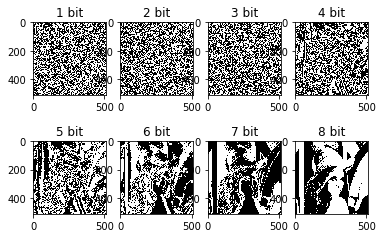

In [17]:
filename = "../input_data/cameraman.png"
k = 8
img = cv2.imread(filename,0)

a = BitPlaneSlicing(img,k)

## part 3

### 1) lena1.jpg appears to be a certain bit plane of the original lena image( maybe bitplane 4?)
### 2) lena2.jpg appears to be the 2 bit version of the original 8 bit image
### 3) lena3.jpg seems to have some kind of threshholding, where all values above a thresshold get mapped to 1 and all values below it get mapped to 0. Could be a 1 bit image of original 8 bit image.

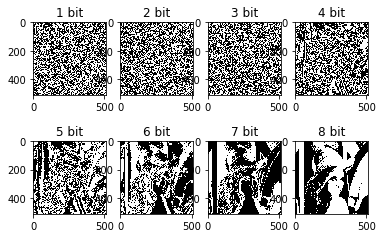

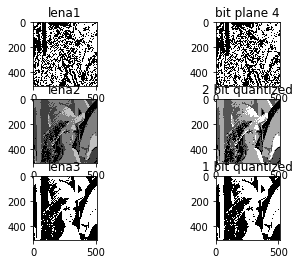

In [32]:
im = cv2.imread("../input_data/lena.jpg",0)
im1 = cv2.imread("../input_data/lena1.jpg")
im2 = cv2.imread("../input_data/lena2.jpg")
im3 = cv2.imread("../input_data/lena3.jpg")

a = BitPlaneSlicing(im,8)
b = bitQuantizeImage(im,2)
c = bitQuantizeImage(im,1)

fig = plt.figure()
plt.subplot(3,2,1)
plt.imshow(im1,'gray')
plt.title("lena1")
plt.subplot(3,2,2)
plt.imshow(a[4],'gray')
plt.title("bit plane 4")
plt.subplot(3,2,3)
plt.imshow(im2,'gray')
plt.title("lena2")
plt.subplot(3,2,4)
plt.imshow(b,'gray')
plt.title("2 bit quantized")
plt.subplot(3,2,5)
plt.imshow(im3,'gray')
plt.title("lena3")
plt.subplot(3,2,6)
plt.imshow(c,'gray')
plt.title("1 bit quantized")

plt.show()
